In [11]:
import numpy as np

import pyswarms as ps

from simulation.BaseSimulation import *
from simulation.PSimulation import *

import matplotlib.pyplot as plt

from pyswarms.utils.plotters import plot_cost_history

In [87]:
def callpsim(x):
    result = np.zeros(x.shape[0])
    
    for i in range(x.shape[0]):
        my_sim = ProbabilisticSimulation(field_size = (100, 100), n_bots = 10, p_resource = 0.2, resource_dist = (10, 3), p_leave_trail = x[i][0], p_follow_trail = x[i][1])
        my_sim.init_resources()
        my_sim.init_bots()
        for _ in range(4_000):
            my_sim.simulate_step()
            
        result[i] = -my_sim.stored_food
    
    return result

In [88]:
options = {'c1': 0.5, 'c2': 0.5, 'w': 0.1}
bounds = (np.zeros(2), np.ones(2))
optimizer = ps.single.GlobalBestPSO(n_particles = 8, dimensions = 2, options=options, bounds=bounds)

In [89]:
s = optimizer.optimize(callpsim, iters=10)

2021-03-29 10:40:42,635 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.1}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-723
2021-03-29 10:41:50,458 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -723.0, best pos: [0.73931162 0.66709909]


In [86]:
s

(-786.0, array([0.60802412, 0.55162703]))

<AxesSubplot:title={'center':'Cost History'}, xlabel='Iterations', ylabel='Cost'>

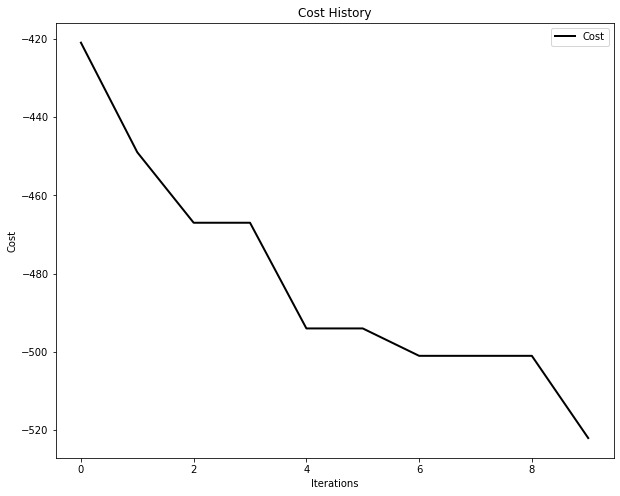

In [61]:
plot_cost_history(cost_history=optimizer.cost_history)